In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import pandas as pd
from datetime import datetime, date, time
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo
import numpy as np
import numpy.ma as ma
import gsw 
import os
import cv2
import imageio.v2 as imageio
from tqdm import tqdm

from T_S_diagram import ts_diagram, ts_diagram_superposees, ts_diagram_video

from data_loading import get_LADCP, get_SADCP,get_CTD,get_bathy, get_2021_CTD_data

In [2]:
# Load the data from the file
year = 2019
CTD = get_CTD(year)
bathy = get_bathy()

proj = ccrs.Mercator(central_longitude=4.5, min_latitude=35.0, max_latitude=45.0)

In [3]:
CTD

<xarray.Dataset> Size: 6MB
Dimensions:      (time: 118, depth: 2901)
Coordinates:
  * time         (time) datetime64[ns] 944B 2019-06-08T08:31:14.999992 ... 20...
  * depth        (depth) float64 23kB 0.0 0.9921 1.984 ... 2.856e+03 2.857e+03
    idx          (time) int64 944B 0 1 2 3 4 5 6 ... 111 112 113 114 115 116 117
    latitude     (time) float64 944B 42.98 42.95 42.25 ... 42.67 42.83 42.92
    longitude    (time) float64 944B 5.668 5.644 4.983 ... 6.133 6.131 6.132
Data variables:
    temperature  (time, depth) float64 3MB nan nan 18.5 18.57 ... nan nan nan
    salinity     (time, depth) float64 3MB nan nan 38.01 38.01 ... nan nan nan

## Cartes de tous les index

In [4]:
time_values = CTD.time.values  # Récupère les timestamps

def format_time(x, pos):
    # Convertir en datetime64 (en prenant en compte les nanosecondes correctement)
    dt = np.datetime64(int(x), 'ns')  # Convertir float en datetime64 avec précision ns
    return np.datetime_as_string(dt, unit='s')  # Afficher au format YYYY-MM-DD HH:MM:SS

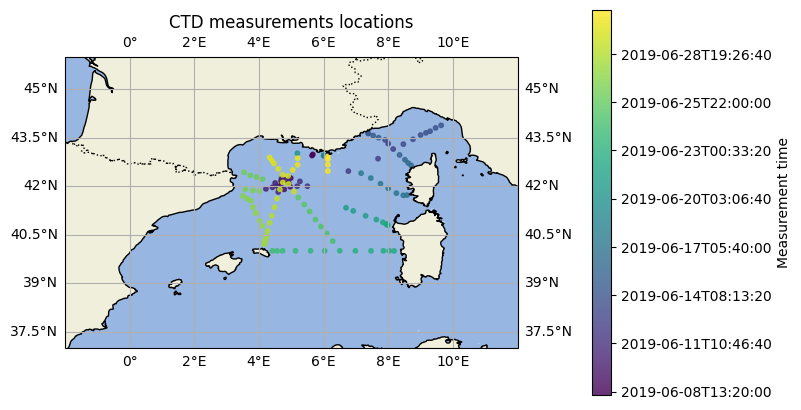

In [5]:
# Map of measurements locations
fig, ax = plt.subplots(figsize=(8,5), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-2, 12, 37, 46])
ax.coastlines()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN)
ax.gridlines(draw_labels=True)
sc = ax.scatter(CTD.longitude, CTD.latitude, s=10, c=CTD.time.values, cmap='viridis', alpha=0.8)
cbar = plt.colorbar(sc, ax=ax, pad = 0.12, label='Measurement time')
cbar.ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_time))
plt.title('CTD measurements locations')
plt.show()

### Carte et Diagramme T-S au niveau du front Balearic

Coordonnées front (à peu près) d'après Carret et al. 2019

Latitude front : 40.5°N-42.5°N

Longitude front : 5°E-8°E

In [6]:
idx_balearic = 73
CTD.latitude[idx_balearic].values, CTD.longitude[idx_balearic].values

(array(40.74980556), array(5.91620556))

Carte correspondante :

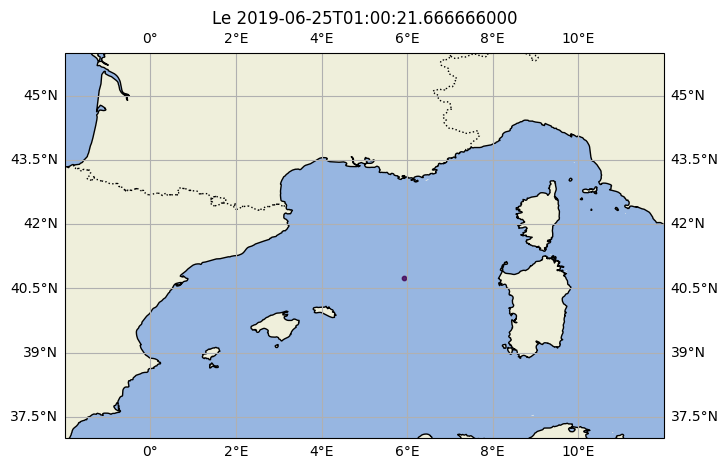

In [7]:
# Map of measurements locations
fig, ax = plt.subplots(figsize=(8,5), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-2, 12, 37, 46])
ax.coastlines()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN)
ax.gridlines(draw_labels=True)
sc = ax.scatter(CTD.longitude[idx_balearic], CTD.latitude[idx_balearic], s=10, c=CTD.time[idx_balearic].values, alpha=0.8, cmap='viridis')
plt.title(f'Le {CTD.time[idx_balearic].values}')
plt.show()

Diagramme T-S correspondant : 

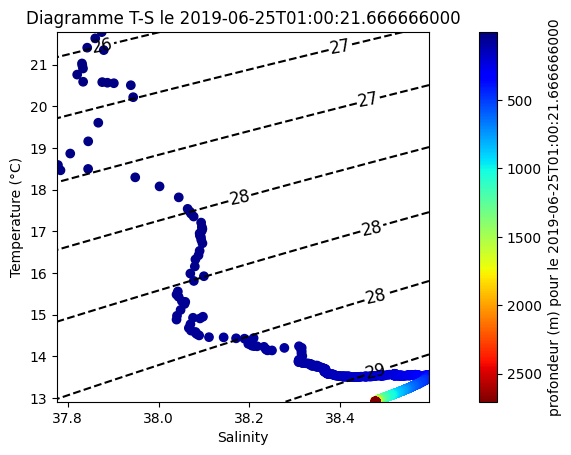

In [8]:
a = ts_diagram_video(CTD.salinity[idx_balearic], CTD.temperature[idx_balearic]
            , CTD.depth, CTD.time[idx_balearic].values )

### Carte et diagramme T-S de par et d'autre du front superposée : 

In [9]:
idx_max = 77
idx_min = 64
section_CTD = CTD.isel(time=[idx_min, idx_max])
section_CTD = section_CTD.sortby('latitude')
section_CTD['section_idx'] = np.arange(len(section_CTD.latitude))

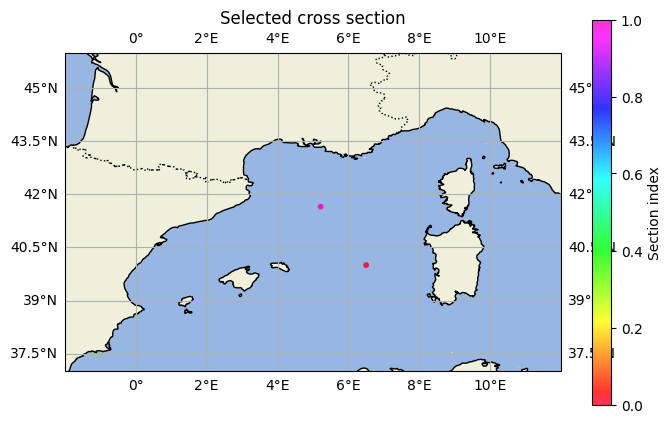

In [10]:
# Map of measurements locations
fig, ax = plt.subplots(figsize=(8,5), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-2, 12, 37, 46])
ax.coastlines()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN)
sc = ax.scatter(section_CTD.longitude, section_CTD.latitude, s=10, c=section_CTD.section_idx, alpha=0.8, cmap='gist_rainbow')
ax.gridlines(draw_labels=True)
plt.colorbar(sc, ax=ax, label='Section index')
plt.title('Selected cross section')
plt.show()

<Figure size 640x480 with 0 Axes>

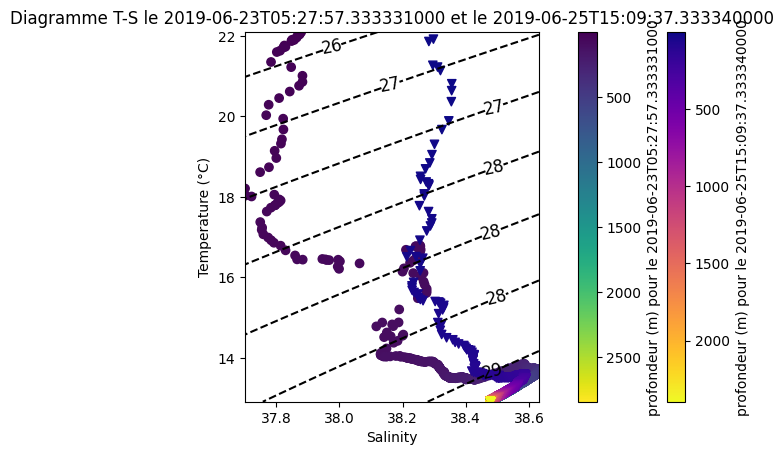

In [11]:
plt.figure()
a = ts_diagram_superposees(section_CTD.salinity[0], section_CTD.temperature[0]
                , section_CTD.depth, section_CTD.salinity[-1], section_CTD.temperature[-1], 
                section_CTD.depth, section_CTD.time[0].values, section_CTD.time[-1].values )

### Carte et Diagramme T-S au niveau de la côte française

In [12]:
idx_max = 49
idx_min = 48
section_CTD = CTD.isel(time=[idx_min, idx_max])
section_CTD = section_CTD.sortby('latitude')
section_CTD['section_idx'] = np.arange(len(section_CTD.latitude))

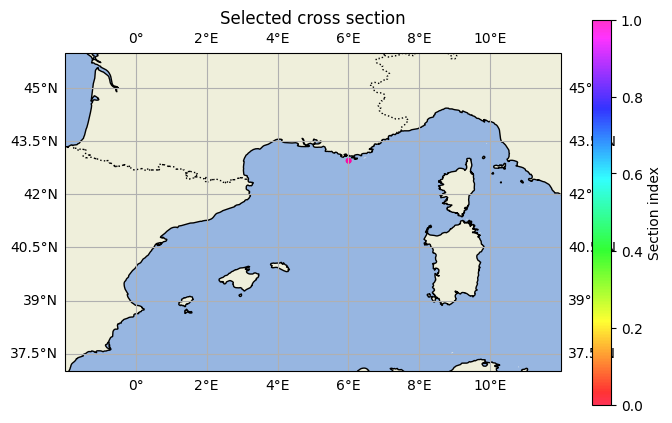

In [13]:
# Map of measurements locations
fig, ax = plt.subplots(figsize=(8,5), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-2, 12, 37, 46])
ax.coastlines()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN)
sc = ax.scatter(section_CTD.longitude, section_CTD.latitude, s=10, c=section_CTD.section_idx, alpha=0.8, cmap='gist_rainbow')
ax.gridlines(draw_labels=True)
plt.colorbar(sc, ax=ax, label='Section index')
plt.title('Selected cross section')
plt.show()

<Figure size 640x480 with 0 Axes>

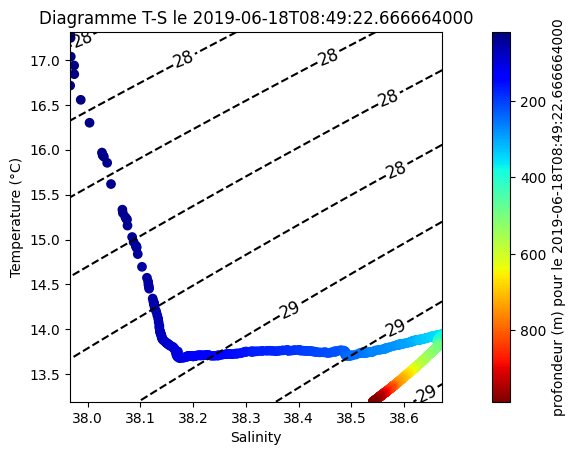

In [14]:
plt.figure()
a = ts_diagram(section_CTD.salinity[0], section_CTD.temperature[0]
                , section_CTD.depth, section_CTD.time[0].values)

## Carte et diagramme T-S en fonction d'une date précise

In [15]:
index_time = []
print(f"Pour chaque temps correspond l'indice suivant : \n")
for i in range(len(CTD.time.values)):
        index_time.append( str(i) + ' = ' + str(CTD.time[i].values ))
        print(index_time[i])

Pour chaque temps correspond l'indice suivant : 

0 = 2019-06-08T08:31:14.999992000
1 = 2019-06-08T11:59:00.000004000
2 = 2019-06-08T17:47:35.333339000
3 = 2019-06-08T23:51:20.000004000
4 = 2019-06-09T02:20:26.000002000
5 = 2019-06-09T11:58:19.666658000
6 = 2019-06-09T15:58:34.666663000
7 = 2019-06-09T18:36:51.999992000
8 = 2019-06-09T21:12:51.999997000
9 = 2019-06-09T23:40:36.333328000
10 = 2019-06-10T02:29:11.333332000
11 = 2019-06-10T07:08:02.333329000
12 = 2019-06-10T09:53:04.999995000
13 = 2019-06-10T14:17:55.000006000
14 = 2019-06-10T17:48:52.000002000
15 = 2019-06-10T21:54:52.666671000
16 = 2019-06-11T01:57:31.666670000
17 = 2019-06-11T13:01:48.000004000
18 = 2019-06-11T16:40:45.999996000
19 = 2019-06-11T20:20:23.000008000
20 = 2019-06-12T09:29:56.666668000
21 = 2019-06-12T16:53:32.666679000
22 = 2019-06-12T21:43:05.666673000
23 = 2019-06-13T01:09:46.666660000
24 = 2019-06-13T04:09:41.666667000
25 = 2019-06-13T15:50:43.999995000
26 = 2019-06-13T19:24:22.666676000
27 = 2019-06-14

### Choisir une date en particulier :

In [16]:
idx = 65

Carte correspondante :

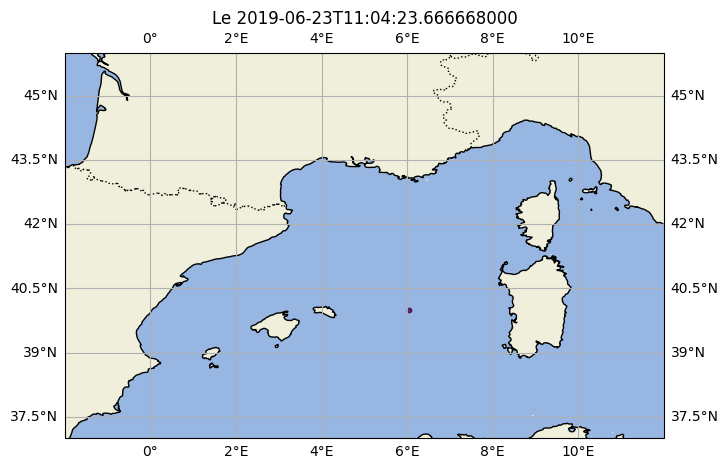

In [17]:
# Map of measurements locations
fig, ax = plt.subplots(figsize=(8,5), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-2, 12, 37, 46])
ax.coastlines()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN)
ax.gridlines(draw_labels=True)
sc = ax.scatter(CTD.longitude[idx], CTD.latitude[idx], s=10, c=CTD.time[idx].values, alpha=0.8, cmap='viridis')
# plt.colorbar(sc, ax=ax, label='Section index')
plt.title(f'Le {CTD.time[idx].values}')
plt.show()

Diagramme T-S correspondant :

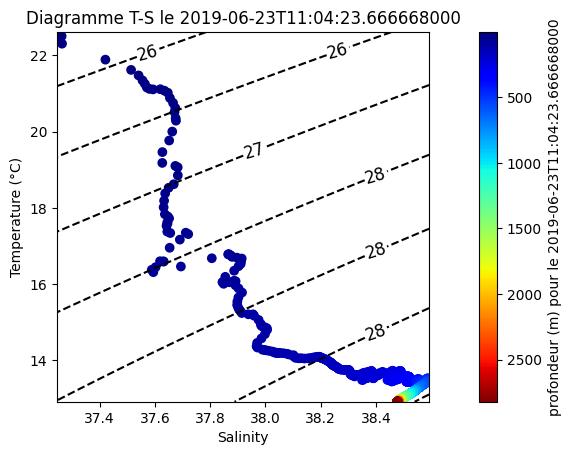

In [18]:
a = ts_diagram_video(CTD.salinity[idx], CTD.temperature[idx]
            , CTD.depth, CTD.time[idx].values )

### Pour aller plus loin, création de tous les diagrammes T-S et carte correspondantes puis créations d'un film (format mp4 pour plus de souplesse de réglage) pour visualiser l'évolution temporelle :)

In [19]:
# Création du répertoire de sauvegarde
save_dir = "all_TS_diagram"
os.makedirs(save_dir, exist_ok=True)

#plt.figure()
for i in tqdm(range(len(CTD.time.values))):
    #plt.figure(figsize=(20,8))
    a = ts_diagram_video(CTD.salinity[i], CTD.temperature[i]
                , CTD.depth, CTD.time[i].values )

    plt.savefig(os.path.join(save_dir, f"TS_{i}.png"))
    plt.close()  # Évite d'ouvrir trop de figures

print(f"Tous les diagramme TS ont été générés avec succès")

plt.figure()
for i in tqdm(range(len(CTD.time.values))):
    # Map of measurements locations
    fig, ax = plt.subplots(figsize=(8,5), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent([-2, 12, 37, 46])
    ax.coastlines()
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.OCEAN)
    sc = ax.scatter(CTD.longitude[i], CTD.latitude[i], s=10, c=CTD.time[i].values, alpha=0.8, cmap='viridis')
   # plt.colorbar(sc, ax=ax, label='Section index')
    ax.gridlines(draw_labels=True)
    plt.title(f'Le {CTD.time[i].values}')

    plt.savefig(os.path.join(save_dir, f"carte_{i}.png"))
    plt.close()  # Évite d'ouvrir trop de figures
print(f"Toutes les cartes ont été générés avec succès")

# Dossiers contenant les images
save_dir = "all_TS_diagram"
merged_dir = "all_TS_diagram_merged_images"  # Nouveau dossier pour les images combinées
os.makedirs(merged_dir, exist_ok=True)

# Récupération et tri des images par ordre (assume que les noms sont du type "carte_1.png" et "TS_1.png")
images_carte = sorted(
    [f for f in os.listdir(save_dir) if f.startswith("carte_") and f.endswith(".png")],
    key=lambda x: int(x.split("_")[1].split(".")[0])
)

images_TS = sorted(
    [f for f in os.listdir(save_dir) if f.startswith("TS_") and f.endswith(".png")],
    key=lambda x: int(x.split("_")[1].split(".")[0])
)

# Vérification que les deux listes sont de la même longueur
assert len(images_carte) == len(images_TS), "Les nombres d'images carte et TS ne correspondent pas."

# Fusionner les images une par une
for carte, ts in tqdm(zip(images_carte, images_TS), total=len(images_carte), desc="Fusion des images"):
    carte_path = os.path.join(save_dir, carte)
    ts_path = os.path.join(save_dir, ts)

    # Charger les images
    img_carte = cv2.imread(carte_path)
    img_ts = cv2.imread(ts_path)

    # Redimensionner l'image TS pour qu'elle ait la même hauteur que la carte
    height, width, _ = img_carte.shape
    img_ts = cv2.resize(img_ts, (int(img_ts.shape[1] * height / img_ts.shape[0]), height))

    # Concaténer les images horizontalement
    merged_image = cv2.hconcat([img_carte, img_ts])

    # Sauvegarder l'image fusionnée
    merged_name = f"merged_{carte.split('_')[1]}"
    merged_path = os.path.join(merged_dir, merged_name)
    cv2.imwrite(merged_path, merged_image)

print(f"✅ Toutes les images fusionnées sont enregistrées dans {merged_dir}")

# ==============================
# 🎥 Création de la vidéo finale
# ==============================

video_path = os.path.join(merged_dir, "all_TS_diagram.mp4")
fps = 5  # Ajuste la fluidité

# Récupérer toutes les images fusionnées
merged_images = sorted(
    [f for f in os.listdir(merged_dir) if f.startswith("merged_") and f.endswith(".png")],
    key=lambda x: int(x.split("_")[1].split(".")[0])
)

# Générer la vidéo
with imageio.get_writer(video_path, fps=fps) as writer:
    for img_name in tqdm(merged_images, desc="Création de la vidéo"):
        img_path = os.path.join(merged_dir, img_name)
        image = imageio.imread(img_path)
        writer.append_data(image)

print(f"🎉 Vidéo MP4 créée avec succès : {video_path}")


100%|█████████████████████████████████████████| 118/118 [00:19<00:00,  6.11it/s]


Tous les diagramme TS ont été générés avec succès


100%|█████████████████████████████████████████| 118/118 [00:23<00:00,  5.08it/s]


Toutes les cartes ont été générés avec succès


Fusion des images: 100%|██████████████████████| 118/118 [00:01<00:00, 75.56it/s]


✅ Toutes les images fusionnées sont enregistrées dans all_TS_diagram_merged_images


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1466, 500) to (1472, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
Création de la vidéo: 100%|██████████████████| 118/118 [00:00<00:00, 120.47it/s]


🎉 Vidéo MP4 créée avec succès : all_TS_diagram_merged_images/all_TS_diagram.mp4


<Figure size 640x480 with 0 Axes>